Assignment 1

1) 
    k = 1
    - Nearest neightbor is of class "Chinstrap", distance 1.3
    - Therefore, the penquin is classified as "Chinstrap".

    k = 3
    - 3 nearest neighbors are:
        - Chinstrap, distance 1.3
        - Chinstrap, distance 1.6
        - Gentoo, distance 1.9
    - Because "Chinestrap" appears more, the penguin is classified as "Chinstrap".

    k = 5
    - 5 nearst neighbors are:
        - Chinstrap, distance 1.3
        - Chinstrap, distance 1.6
        - Gentoo, distance 1.9
        - Gentoo, distance 2.3
        - Chinstrap, distance 2.4
    - Because "Chinstrap" appears 3 times, and "Gentoo" appears 2 times,the penguin is classified as "Chinstrap"

2)

Degree 1 Coefficients: [0.00949133 2.03930393]
Degree 1 Training Cost: 0.10463481642019379
Degree 1 Validation Cost: 0.18240178712130306


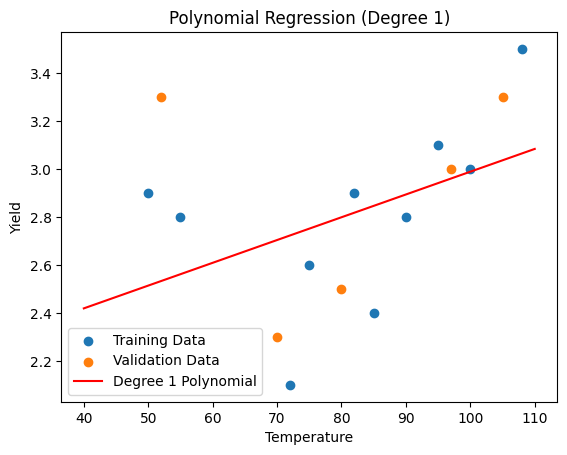

Degree 3 Coefficients: [-1.27638775e-05  3.85701938e-03 -3.51035040e-01  1.24563531e+01]
Degree 3 Training Cost: 0.035146827935118766
Degree 3 Validation Cost: 0.04602546697787343


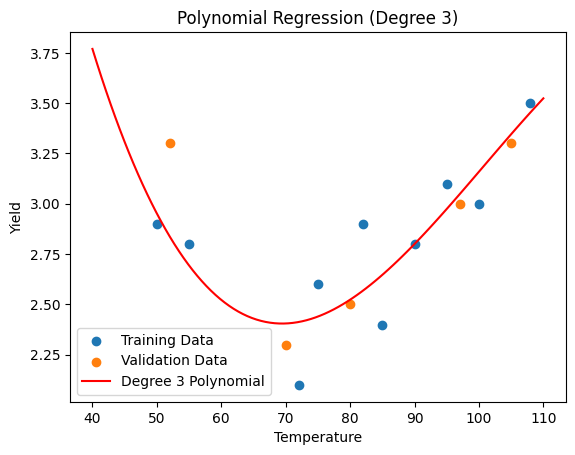

Degree 5 Coefficients: [ 6.52325597e-08 -2.55267178e-05  3.91192646e-03 -2.92247845e-01
  1.06048151e+01 -1.46540508e+02]
Degree 5 Training Cost: 0.03080018634816383
Degree 5 Validation Cost: 0.036480523796764745


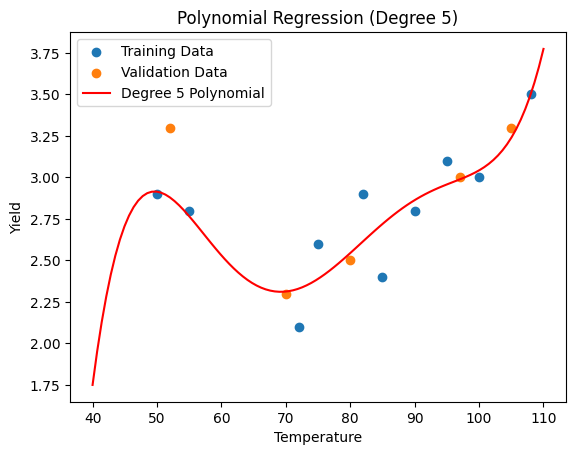

Degree 10 Coefficients: [-3.03505623e-13  1.89865640e-10 -4.84073968e-08  5.96529174e-06
 -2.22084145e-04 -3.65021538e-02  6.13397531e+00 -4.38697708e+02
  1.74758496e+04 -3.77989748e+05  3.47605967e+06]
Degree 10 Training Cost: 6.52891143814734e-14
Degree 10 Validation Cost: 69.81710448025699


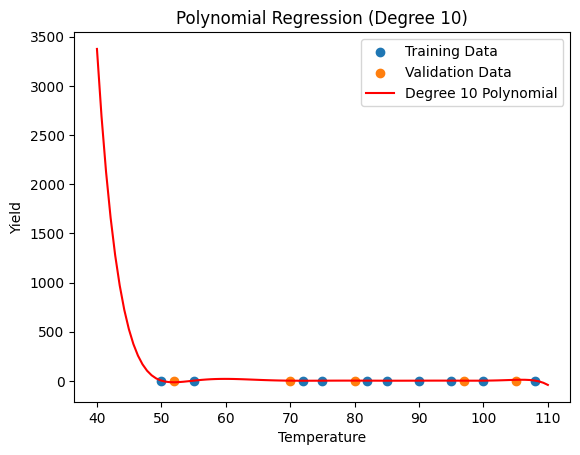

Degree 15 Coefficients: [-2.22722500e-24  6.93852054e-22 -3.62997024e-20 -5.96635450e-18
  1.18299501e-16  6.65086363e-14  2.92647532e-12 -5.23626431e-10
 -6.31538389e-08  2.49200256e-06  7.84595704e-04 -1.55891468e-02
 -8.34467453e+00  7.45361022e+02 -2.52635247e+04  3.14718285e+05]
Degree 15 Training Cost: 9.926562152362186e-18
Degree 15 Validation Cost: 46.330788040621414


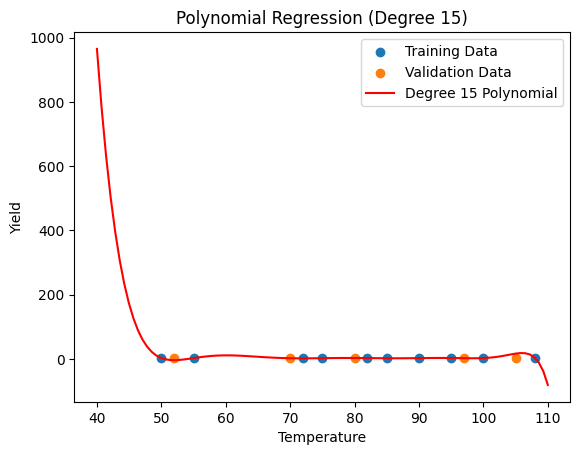

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data from the table
temperature = np.array([52, 55, 50, 70, 75, 72, 80, 82, 85, 97, 95, 90, 105, 108, 100])
yield_data = np.array([3.3, 2.8, 2.9, 2.3, 2.6, 2.1, 2.5, 2.9, 2.4, 3.0, 3.1, 2.8, 3.3, 3.5, 3.0])

# Indices for validation set
data_points = [1,4,7,10,13]
validation_indices = [x-1 for x in data_points]

# Create training and validation sets
x_train = np.delete(temperature, validation_indices)
y_train = np.delete(yield_data, validation_indices)
x_validation = temperature[validation_indices]
y_validation = yield_data[validation_indices]

def polynomial_regression(x_train, y_train, x_validation, y_validation, degree):
    # Fit the polynomial regression model
    mymodel = np.poly1d(np.polyfit(x_train, y_train, degree))

    # Calculate the cost (Mean Squared Error) for training and validation sets
    train_predictions = mymodel(x_train)
    validation_predictions = mymodel(x_validation)

    train_cost = np.mean((train_predictions - y_train)**2)
    validation_cost = np.mean((validation_predictions - y_validation)**2)

    return mymodel, train_cost, validation_cost

degrees = [1, 3, 5, 10, 15]

for degree in degrees:
    # Create the polynomial regression model
    model, train_cost, validation_cost = polynomial_regression(x_train, y_train, x_validation, y_validation, degree)

    # Print the coefficients
    print(f"Degree {degree} Coefficients: {model.coefficients}")

    # Print the costs
    print(f"Degree {degree} Training Cost: {train_cost}")
    print(f"Degree {degree} Validation Cost: {validation_cost}")

    # Plot the data and the regression line
    plt.figure()
    plt.scatter(x_train, y_train, label="Training Data")
    plt.scatter(x_validation, y_validation, label="Validation Data")

    myline = np.linspace(40, 110, 100)
    plt.plot(myline, model(myline), color='red', label=f"Degree {degree} Polynomial")

    plt.xlabel("Temperature")
    plt.ylabel("Yield")
    plt.title(f"Polynomial Regression (Degree {degree})")
    plt.legend()
    plt.show()
